In [1]:
# %ls yelp_dataset
# % pwd
# input_dir = "/Users/chenghsi/chchao/NYU/DataScienceCourse/yelp/"
input_dir = "/home/ubuntu/chchao/"

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
USERPATH = input_dir + "yelp_dataset/yelp_academic_dataset_user.json"
REVIEWPATH = input_dir + "yelp_dataset/yelp_academic_dataset_review.csv"
TOR_BUS_PATH = input_dir + "yelp_dataset/yelp_toronto_business.pickle"
VEGAS_BUS_PATH = input_dir + "yelp_dataset/yelp_vegas_business.pickle"
MONTREAL_BUS_PATH = input_dir + "yelp_dataset/yelp_montreal_business.pickle"
PHOENIX_BUS_PATH = input_dir + "yelp_dataset/yelp_phoenix_business.pickle"
BUS_PATH = input_dir + "yelp_dataset/yelp_academic_dataset_business.pickle"
PROCCESSED_BUS_PATH = input_dir + "yelp_dataset/df_convert/yelp_academic_dataset_business.pickle"
CITY_LIST = input_dir + "city_cnt_list"
STATE_LIST = input_dir + "state_cnt_list"

In [4]:
import pickle

def pickle_to_df(pickle_path, verbose=False, save_pickle=False):
    serial_pickle = pd.read_pickle(pickle_path)
    df = pd.DataFrame.from_dict(serial_pickle, orient='index')
    features = []
    bool_map = {'True': True,'False': False}
    if "business" in pickle_path:
        # print (df.columns.values)
        columns_to_exclude = ['business_id', 'name', 'address', 'is_open']
        # df = df [[df.columns.values]]
        # df = df[['categories', 'review_count', 'stars', 'is_open', 'attributes', 'postal_code']]
        df = df[df['categories'].notnull()] # drop row with null categories
        df = df[df['categories'].str.contains('Restaurant')] # select only rows with restaurant as categories
        la_list = ['stars', 'review_count', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
 'Ambience_hipster', 'Ambience_touristy', 'Ambience_trendy',
 'Ambience_upscale', 'Ambience_casual', 'BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking_garage',
 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_lot',
 'BusinessParking_valet', 'Caters', 'GoodForKids', 'GoodForMeal_dessert',
 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery',
 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
 'Music_live', 'Music_video', 'Music_jukebox', 'DogsAllowed', 'Open24Hours', 'RestaurantsCounterService']
        # for col in la_list:
        for col in df.columns.values:
            df[col].map(bool_map)
        
        
        for feature in df.columns:       
            # if feature not in columns_to_exclude:
            if feature in la_list:
                features.append(feature)
        
        # store the df as pickle for use
        if save_pickle:
            df.to_pickle(input_dir + "yelp_dataset/df_convert/" + pickle_path.split('/')[-1])

        return df[features].fillna(-1), df[["is_open"]]

In [50]:
def feature_target_seperator(df):
    features = []
    la_list = ['stars', 'review_count', 'Ambience_romantic', 'Ambience_intimate', 'Ambience_classy',
 'Ambience_hipster', 'Ambience_touristy', 'Ambience_trendy',
 'Ambience_upscale', 'Ambience_casual', 'BikeParking', 'BusinessAcceptsCreditCards', 'BusinessParking_garage',
 'BusinessParking_street', 'BusinessParking_validated', 'BusinessParking_lot',
 'BusinessParking_valet', 'Caters', 'GoodForKids', 'GoodForMeal_dessert',
 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner',
 'GoodForMeal_breakfast', 'GoodForMeal_brunch', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery',
 'RestaurantsGoodForGroups', 'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut', 'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
 'Music_live', 'Music_video', 'Music_jukebox', 'DogsAllowed', 'Open24Hours', 'RestaurantsCounterService']
    for feature in df.columns:       
        # if feature not in columns_to_exclude:
        if feature in la_list:
            features.append(feature)
    return df[features].fillna(-1), df[["is_open"]]

In [5]:
def csv_to_df(csv_file, verbose=False):
    df = pd.DataFrame.from_csv(csv_file, index_col=2)
    features = []
    

    if verbose:
        print ("columns in csv:\n", list(df))
        print ("Rows with null values:\n", df.isnull().sum())
        print ("is_open counts for csv:\n", df['is_open'].value_counts())

    if "business" in csv_file:
        df = df[['categories', 'review_count', 'stars', 'is_open', 'attributes', 'postal_code']]
        df = df[df['categories'].notnull()] # drop row with null categories
        df = df[df['categories'].str.contains('Restaurant')] # select only rows with restaurant as categories
        
        for feature in df.columns:       
            if feature != "is_open" and feature != "categories":
                features.append(feature)
    
        return df[features], df[["is_open"]]
    
    if "review" in csv_file:
        print (list(df))
    

In [7]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# df = pd.read_pickle(file_name)
X, Y = pickle_to_df(BUS_PATH)
# print (X, Y.transpose().values[0])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [ ]:
spl_list = [2**x for x in range(1,10)]
depth_list = [x for x in range(1,32)]
min_sample_list = [2**x for x in range(0,10)]
class_weight_list = [None, "balanced"]

tree_param = {'min_samples_split':spl_list, 'max_depth':depth_list, 'min_samples_leaf':min_sample_list, 'class_weight':class_weight_list}
tree = GridSearchCV(DecisionTreeClassifier(criterion="entropy"), tree_param)
tree.fit(X, Y.transpose().values[0])

print(tree.best_params_)

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=14, min_samples_leaf=32, criterion="entropy",min_samples_split=256, class_weight=None)
tree_model.fit(X_train, Y_train, verbose=True)

In [14]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, Y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
svm_model.score(X_test, Y_test)

0.83709996700758826

In [129]:
tree_model.score(X_test,Y_test)

0.8117942283563363

In [132]:
import pandas as pd
import sklearn   # This library will help to get the values
from sklearn import metrics

# print (X)
tree_data_accuracy =\
print ( "Accuracy on training = %.6f" % metrics.accuracy_score(tree_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.6f" % metrics.accuracy_score(tree_model.predict(X_test), Y_test) )

vegas_X, vegas_Y = pickle_to_df(VEGAS_BUS_PATH)
print ( "Accuracy on Vegas = %.6f" % metrics.accuracy_score(tree_model.predict(vegas_X), vegas_Y) )

pho_X, pho_Y = pickle_to_df(PHOENIX_BUS_PATH)
print ( "Accuracy on Phoenix = %.6f" % metrics.accuracy_score(tree_model.predict(pho_X), pho_Y) )

# mon_X, mon_Y = pickle_to_df(MONTREAL_BUS_PATH)
# print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(tree_model.predict(mon_X), mon_Y) )

bus_X, bus_Y = pickle_to_df(BUS_PATH)
print ( "Accuracy on All = %.6f" % metrics.accuracy_score(tree_model.predict(bus_X), bus_Y) )

Accuracy on training = 0.817954
Accuracy on test = 0.811794
Accuracy on Vegas = 0.701638
Accuracy on Phoenix = 0.811737
Accuracy on All = 0.757594


In [21]:
import pandas as pd
import sklearn   # This library will help to get the values
from sklearn import metrics

# print (X)
tree_data_accuracy =\
print ( "Accuracy on training = %.6f" % metrics.accuracy_score(svm_model.predict(X_train), Y_train) )
print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )

vegas_X, vegas_Y = pickle_to_df(VEGAS_BUS_PATH)
print ( "Accuracy on Vegas = %.6f" % metrics.accuracy_score(svm_model.predict(vegas_X), vegas_Y) )

pho_X, pho_Y = pickle_to_df(PHOENIX_BUS_PATH)
print ( "Accuracy on Phoenix = %.6f" % metrics.accuracy_score(svm_model.predict(pho_X), pho_Y) )

# mon_X, mon_Y = pickle_to_df(MONTREAL_BUS_PATH)
# print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(svm_model.predict(mon_X), mon_Y) )

tor_X, tor_Y = pickle_to_df(TOR_BUS_PATH)
print ( "Accuracy on Montreal = %.6f" % metrics.accuracy_score(svm_model.predict(tor_X), tor_Y) )

bus_X, bus_Y = pickle_to_df(BUS_PATH)
print ( "Accuracy on All = %.6f" % metrics.accuracy_score(svm_model.predict(bus_X), bus_Y) )

Accuracy on training = 0.836042
Accuracy on test = 0.837100
Accuracy on Vegas = 0.708264
Accuracy on Phoenix = 0.735478
Accuracy on Montreal = 0.709556
Accuracy on All = 0.836306


In [130]:
print ("AUC on the count TRAIN data = %.3f" % metrics.roc_auc_score(tree_model.predict(X_train), Y_train))
print ("AUC on the count TEST data = %.3f" % metrics.roc_auc_score(tree_model.predict(X_test), Y_test))

AUC on the count TRAIN data = 0.799
AUC on the count TEST data = 0.790


In [11]:
# csv_to_df(REVIEWPATH) # huge memory hit....

In [119]:
import numpy
probabilities = tree_model.predict_proba(X_test)[:, 1]
prediction = probabilities > 0.5
# print (prediction)
unique, counts = numpy.unique(prediction, return_counts=True)
print (dict(zip(unique, counts)))

confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_test, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_large)

{False: 264, True: 1330}
      p    n
Y  1104  226
N    65  199


In [120]:
print (1155/(1155+439))

0.7245922208281054


In [121]:
import numpy
probabilities = tree_model.predict_proba(X_train)[:, 1]
prediction = probabilities > 0.5
# print (prediction)
unique, counts = numpy.unique(prediction, return_counts=True)
print (dict(zip(unique, counts)))

confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_train, prediction, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_large)

{False: 786, True: 3993}
      p    n
Y  3294  699
N   174  612


In [105]:
print (3482/(3482+1297))

0.7286043105252145


In [24]:
df = pd.read_pickle(PROCCESSED_BUS_PATH)

In [25]:
df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Smoking,AgesAllowed,DietaryRestrictions,Open24Hours
--6MefnULPED_I942VcFNA,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.840905,-79.399604,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--9e1ONYQuAa-CB_Rrw7Tw,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.123183,-115.169190,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
--DaPTJW3-tB1vP-PfdTEg,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,Corso Italia,1218 Saint Clair Avenue W,Toronto,ON,M6E,43.677807,-79.444674,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--FBCX-N37CMYDfs790Bnw,--FBCX-N37CMYDfs790Bnw,The Bar At Bermuda & St. Rose,Southeast,11624 Bermuda Rd,Henderson,NV,89052,35.978689,-115.155016,4.0,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
--GM_ORV2cYS-h38DSaCLw,--GM_ORV2cYS-h38DSaCLw,Mm Mm Pizza,,407 S Central Ave,Canonsburg,PA,15317,40.252569,-80.183859,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Create df hashmap of state_dfs[state][city]
state_dfs = {} 
with open(CITY_LIST, 'r') as city_list:
    for line in city_list:
        city = line.split('|')[0].strip()
        state = line.split('|')[1].strip()
        count = line.split('|')[2].strip()
        city_df = df.loc[df['city'] == city]
        city_df.to_pickle(input_dir + "yelp_dataset/df_convert/" + state + "_" + city + ".pickle")
        try:
            type(state_dfs[state])
        except:
            state_dfs[state] = {}
        state_dfs[state][city] = city_df
print (state_dfs.keys()) 

dict_keys(['NV', 'ON', 'AZ', 'NC', 'PA', 'QC', 'EDH', 'OH', 'WI', 'BW', 'IL', 'SC'])


In [129]:
# Create df hashmap of just_state_dfs[state]
just_state_dfs = {}
with open(STATE_LIST, 'r') as state_list:
    for line in state_list:
        state = line.split('|')[0].strip()
        count = line.split('|')[1].strip()
        just_state_df = df.loc[df['state'] == state]
        # city_df.to_pickle(input_dir + "yelp_dataset/df_convert/" + state + "_" + city + ".pickle")
        # try:
        #     type(just_state_dfs[state])
        # except:
        #     just_state_dfs[state] = {}
        if int(count) > 100:
            just_state_dfs[state] = just_state_df
print (just_state_dfs.keys())

dict_keys(['AZ', 'NV', 'ON', 'NC', 'OH', 'PA', 'QC', 'WI', 'EDH', 'BW', 'IL', 'SC', 'MLN', 'HLD'])


In [152]:
from sklearn import svm
from sklearn.model_selection import cross_val_predict

def create_svm_model(df, gridcv=False, verbose=False):
    X, Y = feature_target_seperator(df)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

    svm_model = svm.SVC(kernel='linear')
    # svm_model = svm.SVC(C=10, gamma=0.001, kernel='rbf', probability=True)
    svm_model.fit(X_train, Y_train.values.ravel())
    if verbose:
        print ( "Accuracy on training = %.6f" % metrics.accuracy_score(svm_model.predict(X_train), Y_train) )
        print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )
        print ("Area under the ROC curve on test data = %.3f (SVM)" % metrics.roc_auc_score(Y_test, svm_model.predict(X_test)))
    
    # predicted = cross_val_predict(svm_model, X, Y, cv=10)
    # print ( "cross validation score = %.6f" % metrics.accuracy_score(Y, predicted))

    return svm_model

In [132]:
def evaulate_model_by_state(svm_model, state):
    '''
    This function loop through all the cities of the state and use the model on it
    '''
    for city in state_dfs[state].keys():
        test_X, test_Y = feature_target_seperator(state_dfs[state][city])
        print ( "Accuracy on %s = %.6f" % (city, metrics.accuracy_score(svm_model.predict(test_X), test_Y) ))
        print ("Area under the ROC curve on test data = %.3f (SVM)" % metrics.roc_auc_score(test_Y, svm_model.predict(test_X)))


In [153]:
def evaulate_model_by_just_state(svm_model, state, verbose=False):
    '''
    This function use the model on the given state and return the auc 
    '''
    state_df = just_state_dfs[state]
    test_X, test_Y = feature_target_seperator(state_df)
    auc = metrics.roc_auc_score(test_Y, svm_model.predict(test_X))
    if verbose:
        print ( "Accuracy on test = %.6f" % metrics.accuracy_score(svm_model.predict(X_test), Y_test) )
        print ("Area under the ROC curve on test data = %.3f (SVM)" % auc)
    return auc


In [88]:
def evaulate_model_against_all(svm_model):
    '''
    This function test the model against all available business datas
    '''
    bus_df = pd.read_pickle(PROCCESSED_BUS_PATH)
    test_X, test_Y = feature_target_seperator(bus_df)
    print ( "Accuracy on total = %.6f" % (metrics.accuracy_score(svm_model.predict(test_X), test_Y) ))

In [131]:
'''
Create hashmap of models for each state
'''
state_models = {}
for state_df in just_state_dfs.keys():
    print ("Creating model for %s" %(state_df))
    state_models[state_df] = create_svm_model(just_state_dfs[state_df])

Creating model for AZ
Accuracy on training = 0.861047
Accuracy on test = 0.851230
Creating model for NV
Accuracy on training = 0.834853
Accuracy on test = 0.825638
Creating model for ON
Accuracy on training = 0.827979
Accuracy on test = 0.826042
Creating model for NC
Accuracy on training = 0.874310
Accuracy on test = 0.853428
Creating model for OH
Accuracy on training = 0.844465
Accuracy on test = 0.841016
Creating model for PA
Accuracy on training = 0.846600
Accuracy on test = 0.833540
Creating model for QC
Accuracy on training = 0.832641
Accuracy on test = 0.823755
Creating model for WI
Accuracy on training = 0.848859
Accuracy on test = 0.823362
Creating model for EDH
Accuracy on training = 0.752907
Accuracy on test = 0.773256
Creating model for BW
Accuracy on training = 0.875505
Accuracy on test = 0.861985
Creating model for IL
Accuracy on training = 0.818396
Accuracy on test = 0.809859
Creating model for SC
Accuracy on training = 0.746377
Accuracy on test = 0.695652
Creating model 

In [161]:
'''
Create a matrix of state_models used against other states
'''
d = []
for state_model in state_models.keys():
    state_dict = {}
    for state in just_state_dfs.keys():
        state_dict[state] = evaulate_model_by_just_state(state_models[state_model], state)
    d.append(state_dict)
        
state_auc_matrix = pd.DataFrame(d)        


In [162]:
state_auc_matrix.set_index(['AZ', 'BW', 'EDH', 'HLD', 'IL', 'MLN', 'NC', 'NV', 'OH', 'ON', 'PA',
       'QC', 'SC', 'WI'])

print (state_auc_matrix)

          AZ        BW       EDH       HLD        IL       MLN        NC  \
0   0.788052  0.533492  0.686657  0.407407  0.758238  0.580000  0.762028   
1   0.785847  0.571419  0.707785  0.527778  0.760337  0.644444  0.761248   
2   0.667700  0.518817  0.658927  0.416667  0.699266  0.537778  0.701088   
3   0.706303  0.525217  0.658562  0.416667  0.715814  0.531111  0.734755   
4   0.600912  0.549908  0.600297  0.462963  0.601141  0.535556  0.629761   
5   0.655579  0.527385  0.636184  0.435185  0.671276  0.551111  0.693216   
6   0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
7   0.742358  0.565618  0.689439  0.546296  0.749812  0.623333  0.747239   
8   0.500176  0.500000  0.501497  0.500000  0.500000  0.500000  0.500000   
9   0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
10  0.657955  0.517177  0.590642  0.462963  0.680906  0.536667  0.658021   
11  0.525009  0.497220  0.513588  0.490741  0.523179  0.555556  0.531018   
12  0.500000

Index(['AZ', 'BW', 'EDH', 'HLD', 'IL', 'MLN', 'NC', 'NV', 'OH', 'ON', 'PA',
       'QC', 'SC', 'WI'],
      dtype='object')


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide


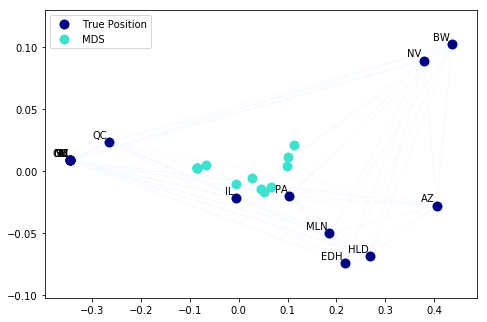

In [220]:
'''
http://scikit-learn.org/dev/auto_examples/manifold/plot_mds.html
'''
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

# n_samples = 20
# seed = np.random.RandomState(seed=3)
# X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
# X_true = X_true.reshape((n_samples, 2))
labels = state_auc_matrix.columns
print (labels)
X_true = state_auc_matrix
# Center the data
X_true -= X_true.mean()
# print (X_true)
distance_matrix = X_true
# print (distance_matrix)

similarities = euclidean_distances(X_true)

# Add noise to the similarities
# noise = np.random.rand(n_samples, n_samples)
# noise = noise + noise.T
# noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
# similarities += noise

mds = manifold.MDS(n_components=14, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=14, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0, label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
# plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

for label, x, y in zip(labels, X_true[:, 0], X_true[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')
        # bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
        # arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
for label, x, y in zip(labels, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2, 2),
        textcoords='offset points', ha='right', va='bottom')
'''
        
plt.show()


In [227]:
"""
clustering result by State
"""
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
db = DBSCAN(metric="euclidean", eps=0.1, min_samples=2).fit(distance_matrix)
# db = DBSCAN(metric="precomputed").fit(distance_matrix)
# print (db.labels_)
# db = DBSCAN(eps=0.3, min_samples=10).fit(distance_matrix)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_



result_dict = {}
for a_set in zip(cluster_labels, labels):
    if a_set[0] not in result_dict.keys():
        result_dict[a_set[0]] = [a_set[1]]
    else:
        result_dict[a_set[0]].append(a_set[1])

print (result_dict)

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))
# """

{-1: ['AZ', 'IL', 'PA'], 0: ['BW', 'NV'], 1: ['EDH', 'HLD', 'MLN'], 2: ['NC', 'OH', 'ON', 'QC', 'SC', 'WI']}


In [232]:
cluster0_df = pd.concat([just_state_dfs['AZ'], just_state_dfs['IL'], just_state_dfs['PA']])
cluster1_df = pd.concat([just_state_dfs['BW'], just_state_dfs['NV']])
cluster2_df = pd.concat([just_state_dfs['EDH'], just_state_dfs['HLD'], just_state_dfs['MLN']])
cluster3_df = pd.concat([just_state_dfs['NC'], just_state_dfs['OH'], just_state_dfs['ON'], 
                         just_state_dfs['QC'], just_state_dfs['SC'], just_state_dfs['WI']])


In [ ]:
cluster0_svm_model = create_svm_model(cluster0_df)
cluster1_svm_model = create_svm_model(cluster1_df)
cluster2_svm_model = create_svm_model(cluster2_df)
cluster3_svm_model = create_svm_model(cluster3_df)

In [235]:
evaulate_model_by_just_state(cluster0_svm_model, 'AZ', verbose= True) 
evaulate_model_by_just_state(cluster0_svm_model, 'IL', verbose= True) 
evaulate_model_by_just_state(cluster0_svm_model, 'PA', verbose= True)  

Accuracy on test = 0.863884
Area under the ROC curve on test data = 0.792 (SVM)
Accuracy on test = 0.863884
Area under the ROC curve on test data = 0.740 (SVM)
Accuracy on test = 0.863884
Area under the ROC curve on test data = 0.715 (SVM)


0.71507856140104187

In [83]:
Phoenix_svm_model = create_svm_model(state_dfs['AZ']['Phoenix'])

Accuracy on training = 0.852205
Accuracy on test = 0.863095


In [85]:
evaulate_model_by_state(svm_model, 'AZ')  

Accuracy on Phoenix = 0.855228
Accuracy on Scottsdale = 0.840708
Accuracy on Mesa = 0.885548
Accuracy on Tempe = 0.848485
Accuracy on Chandler = 0.835106
Accuracy on Gilbert = 0.867804
Accuracy on Glendale = 0.865353
Accuracy on Peoria = 0.891026
Accuracy on Surprise = 0.875000
Accuracy on Goodyear = 0.899371
Accuracy on Avondale = 0.895425


In [89]:
evaulate_model_against_all(Phoenix_svm_model)

Accuracy on total = 0.805085


In [84]:
Toronto_svm_model = create_svm_model(state_dfs['ON']['Toronto'])

Accuracy on training = 0.811345
Accuracy on test = 0.795841


In [116]:
Toronto_svm_model2 = create_svm_model(state_dfs['ON']['Toronto']) # using charlottes's attributes

Accuracy on training = 0.813025
Accuracy on test = 0.806553


In [60]:
evaulate_model_by_state(svm_model, 'ON')

Accuracy on Toronto = 0.806050
Accuracy on Mississauga = 0.857270
Accuracy on Markham = 0.835843
Accuracy on North York = 0.809019
Accuracy on Scarborough = 0.837772
Accuracy on Richmond Hill = 0.796069
Accuracy on Brampton = 0.823383
Accuracy on Vaughan = 0.839888
Accuracy on Etobicoke = 0.836735
Accuracy on Oakville = 0.837545


In [90]:
evaulate_model_against_all(Toronto_svm_model)

Accuracy on total = 0.817603


In [76]:
Charlotte_svm_model = create_svm_model(state_dfs['NC']['Charlotte'])

Accuracy on training = 0.874621
Accuracy on test = 0.852995


In [68]:
evaulate_model_by_state(svm_model, 'NC')

Accuracy on Charlotte = 0.876930
Accuracy on Concord = 0.861004
Accuracy on Matthews = 0.843023
Accuracy on Huntersville = 0.945312
Accuracy on Cornelius = 0.839080


In [95]:
evaulate_model_against_all(Charlotte_svm_model)

Accuracy on total = 0.815210


In [78]:
for state in state_dfs.keys():
    evaulate_model_by_state(Charlotte_svm_model, state)

Accuracy on Las Vegas = 0.819805
Accuracy on Henderson = 0.842653
Accuracy on North Las Vegas = 0.853242
Accuracy on Toronto = 0.801166
Accuracy on Mississauga = 0.853723
Accuracy on Markham = 0.813253
Accuracy on North York = 0.811671
Accuracy on Scarborough = 0.847458
Accuracy on Richmond Hill = 0.773956
Accuracy on Brampton = 0.820896
Accuracy on Vaughan = 0.828652
Accuracy on Etobicoke = 0.836735
Accuracy on Oakville = 0.844765
Accuracy on Phoenix = 0.850760
Accuracy on Scottsdale = 0.822271
Accuracy on Mesa = 0.875849
Accuracy on Tempe = 0.838384
Accuracy on Chandler = 0.832447
Accuracy on Gilbert = 0.855011
Accuracy on Glendale = 0.858785
Accuracy on Peoria = 0.897436
Accuracy on Surprise = 0.864583
Accuracy on Goodyear = 0.886792
Accuracy on Avondale = 0.901961
Accuracy on Charlotte = 0.869210
Accuracy on Concord = 0.868726
Accuracy on Matthews = 0.831395
Accuracy on Huntersville = 0.937500
Accuracy on Cornelius = 0.850575
Accuracy on Pittsburgh = 0.837688
Accuracy on Montréal =

In [91]:
Vegas_svm_model = create_svm_model(state_dfs['NV']['Las Vegas'])

Accuracy on training = 0.837015
Accuracy on test = 0.844003


In [92]:
evaulate_model_by_state(svm_model, 'NV')

Accuracy on Las Vegas = 0.828824
Accuracy on Henderson = 0.845254
Accuracy on North Las Vegas = 0.866894


In [94]:
evaulate_model_against_all(Vegas_svm_model)

Accuracy on total = 0.791578


In [99]:
from sklearn.svm import SVC
X, Y = feature_target_seperator(state_dfs['NC']['Charlotte'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.5)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, Y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
   

# Tuning hyper-parameters for precision



/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anacond

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.387 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.865 (+/-0.061) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.387 (+/-0.001) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.827 (+/-0.071) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.853 (+/-0.054) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.752 (+/-0.067) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.826 (+/-0.069) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.839 (+/-0.053) for {'C': 1, 'kernel': 'linear'}
0.843 (+/-0.052) for {'C': 10, 'kernel': 'linear'}
0.836 (+/-0.043) for {'C': 100, 'kernel': 'linear'}
0.833 (+/-0.043) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



NameError: name 'y_test' is not defined

In [102]:
y_true, y_pred = Y_test, clf.predict(X_test)
print(sklearn.metrics.classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.49      0.61       251
          1       0.86      0.96      0.91       850

avg / total       0.85      0.86      0.84      1101




In [109]:
Charlotte_svm_model = create_svm_model(state_dfs['NC']['Charlotte'])

Accuracy on training = 0.869776
Accuracy on test = 0.874773


In [110]:
evaulate_model_against_all(Charlotte_svm_model)

Accuracy on total = 0.817438


In [112]:
evaulate_model_by_state(svm_model, 'NC')

Accuracy on Charlotte = 0.876930
Accuracy on Concord = 0.861004
Accuracy on Matthews = 0.843023
Accuracy on Huntersville = 0.945312
Accuracy on Cornelius = 0.839080


In [117]:
import numpy
probabilities = Toronto_svm_model2.predict_proba(X_train)[:, 1]
prediction = probabilities > 0.5
# print (prediction)
unique, counts = numpy.unique(prediction, return_counts=True)
print (dict(zip(unique, counts)))

confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_train, prediction, labels=[1, 0]).T,
                                    columns=['p', 'n'], index=['Y', 'N'])

print (confusion_matrix_large)

{False: 177, True: 924}
     p    n
Y  815  109
N   37  140


In [137]:
# X, Y = feature_target_seperator(state_dfs['NV']['Las Vegas'])
X, Y = feature_target_seperator(state_dfs['NC']['Charlotte'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)
svm_model = svm.SVC(kernel='linear')
# svm_model = svm.SVC(C=10, gamma=0.001, kernel='rbf', probability=True)
svm_model.fit(X_train, Y_train.values.ravel())
print ("Area under the ROC curve on test data = %.3f (SVM)" % metrics.roc_auc_score(Y_test, svm_model.predict(X_test)))

Area under the ROC curve on test data = 0.756 (SVM)


In [139]:
from sklearn import svm, datasets, feature_selection
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
transform = feature_selection.SelectPercentile(feature_selection.f_classif)

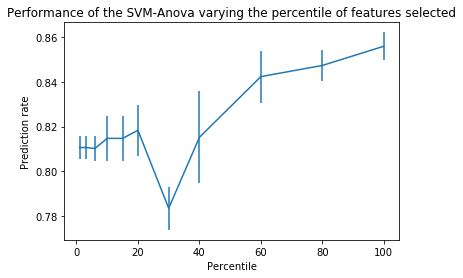

In [141]:
clf = Pipeline([('anova', transform), ('svc', svm.SVC(C=1.0))])
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    # Compute cross-validation score using 1 CPU
    this_scores = cross_val_score(clf, X, Y.values.ravel(), n_jobs=1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))

plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xlabel('Percentile')
plt.ylabel('Prediction rate')

plt.axis('tight')
plt.show()

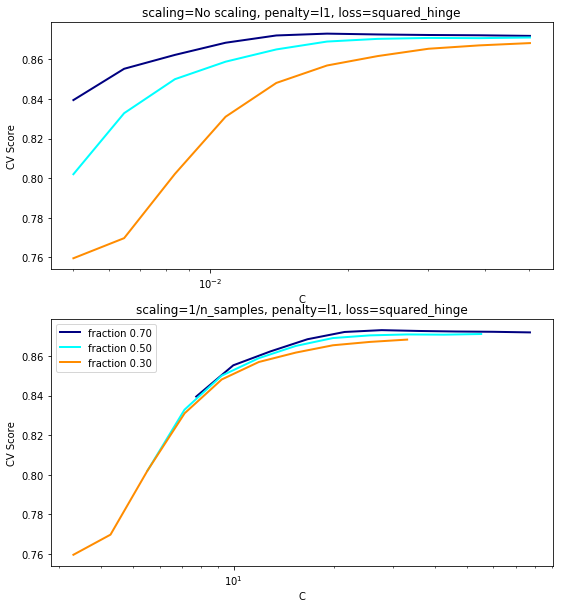

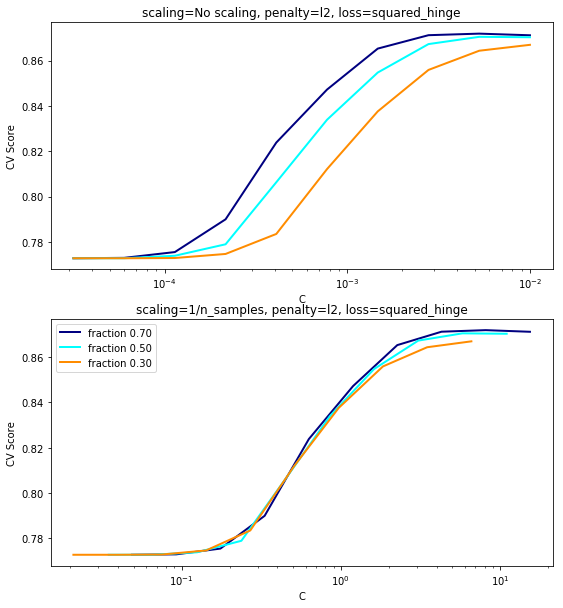

In [145]:

from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets
clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
             np.logspace(-2.3, -1.3, 10), X, Y.values.ravel()),
            (LinearSVC(penalty='l2', loss='squared_hinge', dual=True,
                       tol=1e-4),
             np.logspace(-4.5, -2, 10), X, Y.values.ravel())]

colors = ['navy', 'cyan', 'darkorange']
lw = 2
n_samples = X.shape[0]
train_size = X.shape[1]
for fignum, (clf, cs, X, y) in enumerate(clf_sets):
    # set up the plot for each regressor
    plt.figure(fignum, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size,
                                            n_splits=250, random_state=1))
        grid.fit(X, y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for subplotnum, (scaler, name) in enumerate(scales):
            plt.subplot(2, 1, subplotnum + 1)
            plt.xlabel('C')
            plt.ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            plt.semilogx(grid_cs, scores, label="fraction %.2f" %
                         train_size, color=colors[k], lw=lw)
            plt.title('scaling=%s, penalty=%s, loss=%s' %
                      (name, clf.penalty, clf.loss))

    plt.legend(loc="best")
plt.show()